In [1]:
import pandas as pd
import numpy as np
subs_raw=pd.read_pickle('../Datasets/Main Dataset/submissions.pickle')
#coms_raw=pd.read_pickle('../Datasets/comments.pickle')
from matplotlib import pyplot as plt

subs=subs_raw[['author', 'author_karma', 'author_posts',
       'num_comments', 'score', 'title', 'selftext', 
       'award_name','award_description', 'award_count', 'award_coin_price','awards_value',
       'subreddit',  'id',
       'domain', 'author_fullname',
       'subreddit_id', 'permalink', 'url', 'created', 'author_created',
    ]]

subs['volume']=1

print("Submission shape: ",subs.shape)

#unique values per feature
#for col in subs:
#    print(col,subs[col].nunique())



Submission shape:  (1559351, 22)


C:\Users\Ben\anaconda3\envs\CryptoSent\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


## Subreddits

In [2]:
import plotly.graph_objects as go
y=subs.groupby('subreddit').count().id.sort_values(ascending=True).index
x=subs.groupby('subreddit').count().id.sort_values(ascending=True).values
fig = go.Figure([go.Bar(x=x, y=y,orientation='h')])
fig.update_layout(
    title="Subreddit Activity",
    title_x = 0.5,
    xaxis_title="Number of Posts",
    yaxis_title="Subreddit",
    width=900, height=700,
    font=dict(
        #family="Courier New, monospace",
        size=18,
        #color="RebeccaPurple"
    )
)
fig.show()

## Authors

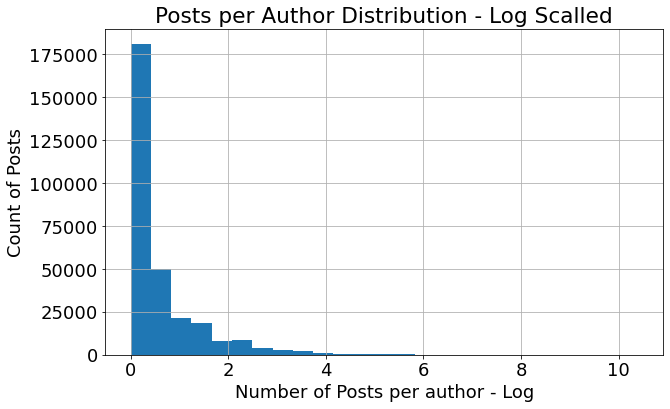

In [3]:
temp=subs[subs.author!='[deleted]'].groupby('author').count().id.sort_values(ascending=False).tail(-1).apply(np.log)
temp=temp.reset_index().rename(columns={'id':'Post Volume Log','author':'Author'})
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
#plt.figure()

temp.hist(bins=25)
plt.xlabel('Number of Posts per author - Log')
plt.ylabel('Count of Posts')
plt.title('Posts per Author Distribution - Log Scalled')
#fig.tight_layout()
#plt.savefig('author_post_hist.png',bbox_inches='tight')
plt.show()



## score

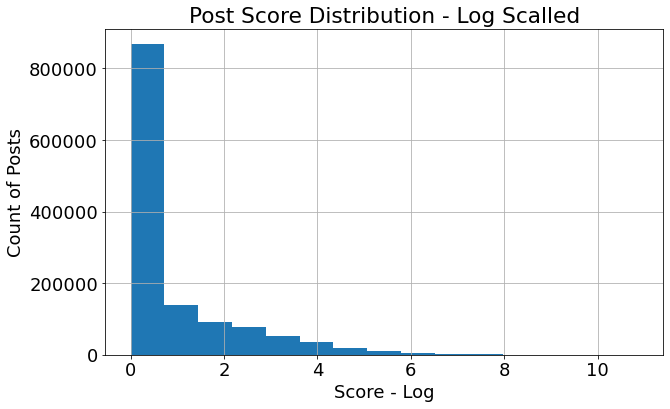

In [4]:

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
#plt.figure()
(pd.DataFrame(subs[subs.author!='[deleted]'].groupby('id').score.sum()).score+1).apply(np.log).hist(bins=15)

plt.xlabel('Score - Log')
plt.ylabel('Count of Posts')
plt.title('Post Score Distribution - Log Scalled')
#fig.tight_layout()
#plt.savefig('author_post_hist.png',bbox_inches='tight')
plt.show()



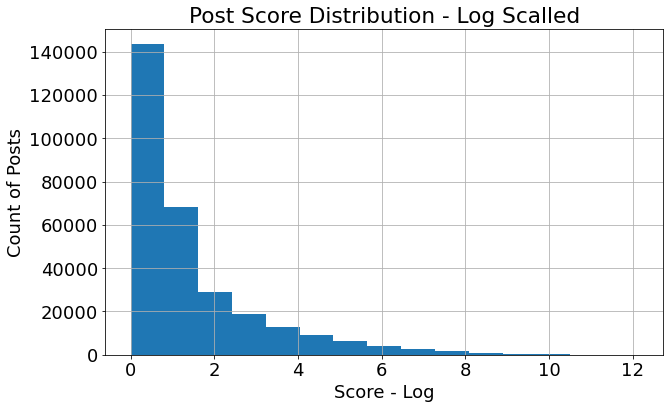

In [5]:

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
#plt.figure()
(pd.DataFrame(subs[subs.author!='[deleted]'].groupby('author').score.sum()).score+1).apply(np.log).hist(bins=15)

plt.xlabel('Score - Log')
plt.ylabel('Count of Posts')
plt.title('Post Score Distribution - Log Scalled')
#fig.tight_layout()
#plt.savefig('author_post_hist.png',bbox_inches='tight')
plt.show()



<Figure size 720x432 with 0 Axes>

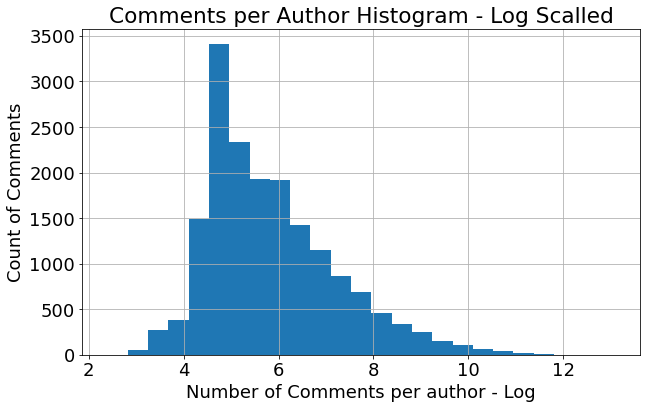

In [6]:
temp=subs.groupby('author').sum().awards_value.sort_values(ascending=False).tail(-1).apply(lambda x: np.log(x+1))
temp=temp[temp>0].reset_index().rename(columns={'id':'Comments Volume Log','author':'Author'})
plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams.update({'font.size': 18})
plt.figure()
temp.hist(bins=25)
plt.xlabel('Number of Comments per author - Log')
plt.ylabel('Count of Comments')
plt.title('Comments per Author Histogram - Log Scalled')
#fig.tight_layout()
#plt.savefig('author_comment_hist.png',bbox_inches='tight')
plt.show()



## scatter


In [144]:
subs.corr()

,author_karma,author_posts,num_comments,score,awards_value,volume
author_karma,1.000000,-0.055019,0.182656,0.029146,0.021967,NaN
author_posts,-0.055019,1.000000,-0.011160,-0.020888,-0.011435,NaN
num_comments,0.182656,-0.011160,1.000000,0.145173,0.158672,NaN
score,0.029146,-0.020888,0.145173,1.000000,0.568729,NaN
awards_value,0.021967,-0.011435,0.158672,0.568729,1.000000,NaN
volume,NaN,NaN,NaN,NaN,NaN,NaN
